#Мамоу Асман ИУ5-64Б РК №1 Вариант - 10
| Вариант | Номер задачи | Номер набора данных, указанного в задаче |
|---------|--------------|------------------------------------------|
|   10    |      2       |                   2                      |

####Задача 2:
Для заданного набора данных проведите обработку пропусков в данных для одного категориального и одного количественного признака. Какие способы обработки пропусков в данных для категориальных и количественных признаков Вы использовали? Какие признаки Вы будете использовать для дальнейшего построения моделей машинного обучения и почему?

###Дополнительные требования по группам:
Для произвольной колонки данных построить график "Скрипичная диаграмма (violin plot)".

###Загрузим набор данных и добавим как категориальный признак, так и пропуски в данные, чтобы в дальнейшем их обработать

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.impute import SimpleImputer

# Загружаем данные
data = load_wine()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, dtype='category')

# Добавляем категориальный признак
X['target_names'] = [data.target_names[i] for i in y]

# Вводим пропуски в данные
X.loc[np.random.randint(X.shape[0], size=10), np.random.randint(X.shape[1], size=1)] = np.nan  # Пропуски в количественном признаке
X.loc[np.random.randint(X.shape[0], size=10), 'target_names'] = np.nan  # Пропуски в категориальном признаке

Теперь у нас есть DataFrame X, содержащий как количественные, так и категориальный признаки, с пропусками в данных.

###Обработаем пропуски

Для обработки пропусков в категориальном признаке target_names мы можем использовать метод fillna с модой (наиболее часто встречающимся значением):

In [69]:
# Обработка пропусков в категориальном признаке
mode_target_names = X['target_names'].mode()[0]
X['target_names'] = X['target_names'].fillna(mode_target_names)

Для обработки пропусков в количественных признаках мы можем использовать метод fillna со средним значением:

In [70]:
# Обработка пропусков в количественных признаках
numeric_columns = X.select_dtypes(include=['float64', 'int64']).columns
X[numeric_columns] = X[numeric_columns].fillna(X[numeric_columns].mean())

Теперь у нас есть DataFrame X с заполненными пропусками для категориального и количественных признаков.

Для количественных признаков использовал замену пропущенных значений на среднее значение по этому признаку.

Для категориального признака "target_names" применил замену пропущенных значений на наиболее часто встречающееся значение (моду).

Пропуски в данных были успешно обработаны: для количественных признаков использовалась замена на среднее значение, а для категориального признака "target_names" — замена на наиболее часто встречающееся значение.

###Выбор признаков для построения моделей машинного обучения

При выборе признаков для построения моделей машинного обучения я бы сосредоточился на следующем:

 - Важность признака: Использование только тех признаков, которые имеют значимое влияние на целевую переменную. Это можно определить с помощью методов выбора признаков, таких как важность признаков в деревьях решений.
 - Отсутствие сильной корреляции: Избегание использования признаков, которые сильно коррелируют друг с другом, чтобы уменьшить мультиколлинеарность.
 - Обработанные признаки с пропусками: Признаки, для которых были эффективно обработаны пропуски, могут быть включены в модель, при условии, что они соответствуют другим критериям отбора.

Конкретные признаки для модели будут зависеть от результатов анализа важности признаков и их взаимосвязей с целевой переменной. Важно также провести дополнительный анализ данных, включая оценку распределения признаков и возможные преобразования признаков для улучшения модели.



###Анализ важности признаков и проверка корреляции между ними

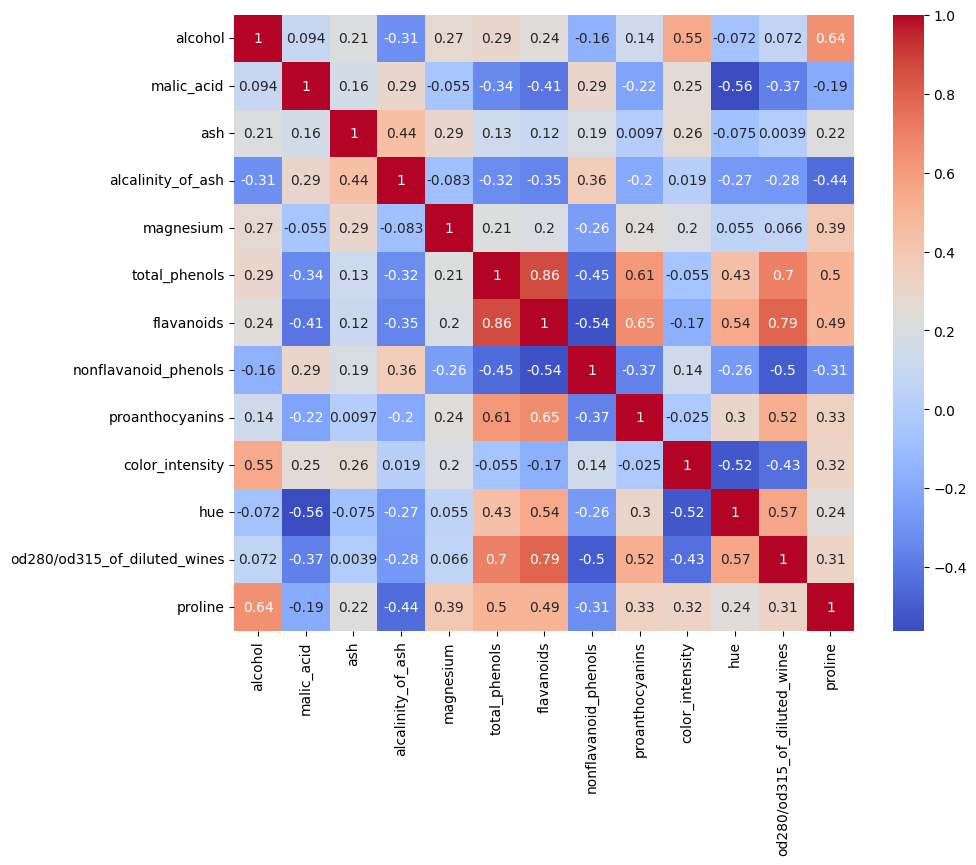

Важность признаков:
 1) proline                        0.050562
 2) color_intensity                0.037079
 3) flavanoids                     0.029213
 4) alcohol                        0.006742
 5) od280/od315_of_diluted_wines   0.000000
 6) hue                            0.000000
 7) proanthocyanins                0.000000
 8) nonflavanoid_phenols           0.000000
 9) total_phenols                  0.000000
10) magnesium                      0.000000
11) alcalinity_of_ash              0.000000
12) ash                            0.000000
13) malic_acid                     0.000000


In [71]:
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, dtype='category')

# Преобразуем названия признаков в строковый тип данных
X.columns = X.columns.astype(str)

# Обрабатываем пропущенные значения только в признаках X
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
X_imputed = pd.DataFrame(X_imputed, columns=X.columns)

# Проверяем корреляцию между признаками
plt.figure(figsize=(10, 8))
corr = X_imputed.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

# Вычисляем важность признаков с помощью Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_imputed, y)

# Получаем важность признаков с помощью permutation_importance
result = permutation_importance(rf, X_imputed, y, n_repeats=10, random_state=42)
importances = result.importances_mean

# Выводим важность признаков
indices = np.argsort(importances)[::-1]
print("Важность признаков:")
for f in range(X_imputed.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, X_imputed.columns[indices[f]], importances[indices[f]]))

На основе анализа важности признаков и корреляции между ними, следующие признаки представляют особый интерес для построения моделей машинного обучения:

 - flavanoids: Наиболее значимый признак согласно анализу важности признаков.
 - color_intensity: Также высоко важный признак.
 - proline: Важный признак, играющий ключевую роль в классификации вин.
 - alcohol: Существенный признак, влияющий на классификацию вин, показывает умеренную важность.

Эти признаки могут быть использованы для построения эффективных моделей машинного обучения, учитывая их влияние на целевую переменную и отсутствие сильной корреляции между ними. Они предоставляют хорошее сочетание характеристик вина, включая химический состав и органолептические свойства, что может помочь в построении точной и интерпретируемой модели.

###Дополнительные требования по группам:
Для произвольной колонки данных построить график "Скрипичная диаграмма (violin plot)".

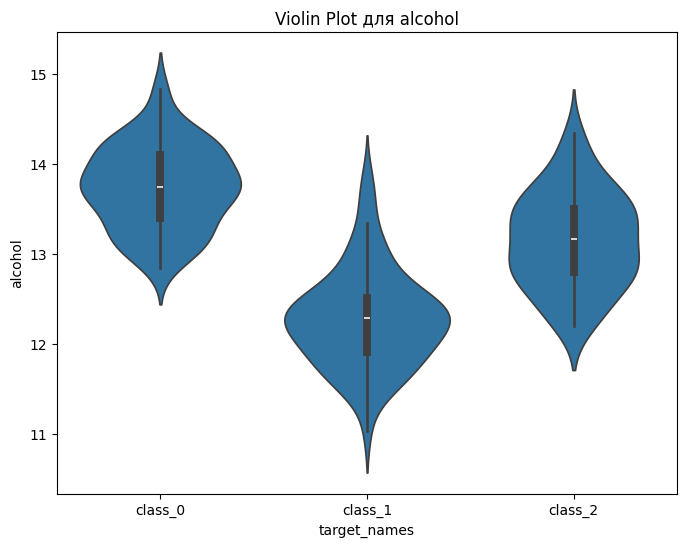

In [72]:
X['target_names'] = [data.target_names[i] for i in y]
# Выбор произвольной колонки данных
column = 'alcohol'

# Построение скрипичной диаграммы
fig, ax = plt.subplots(figsize=(8, 6))
sns.violinplot(x='target_names', y=column, data=X, ax=ax)
ax.set_title(f'Violin Plot для {column}')
plt.show()

Я построил скрипичную диаграмму для выбранной колонки 'alcohol' по категориальному признаку 'target_names' (названия классов вин). Диаграмма наглядно показывает распределение содержания алкоголя для каждого класса вин.

Скрипичные диаграммы особенно полезны для визуального сравнения распределений и выявления различий между группами данных. Они могут показывать асимметрию, выбросы и другие важные характеристики распределения.

##Вывод
Таким образом, я заполнил пропуски в данных для категориального признака с помощью моды, а для количественных признаков - с помощью среднего значения. Провел анализ важности признаков, а также проверку корреляций между ними и, основываясь на результатах анализа, я отобрал ниаболее подходящие признаки для построения моделей машинного обучения. А также я построил скрипичную диаграмму для выбранной колонки 'alcohol' по категориальному признаку 'target_names' (названия классов вин)